### Libraries and dependencies

In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### Import and convert dataset

In [2]:
# Import dataset
NASA_dataset = pd.read_csv("/content/drive/MyDrive/IR-SEED/B0005.csv")

# Shuffle dataset
NASA_dataset = NASA_dataset.sample(frac=1, random_state=64)

# Drop unecessary columns
NASA_dataset = NASA_dataset.drop(["Current_charge", "Voltage_charge", "type", "ambient_temperature", "time", "Battery"], axis=1)

# Split to training and test sets
training_set = NASA_dataset[:int(len(NASA_dataset) * 0.8)]
testing_set = NASA_dataset[int(len(NASA_dataset) * 0.8):]

# Extract features
train_in = training_set.drop("Capacity", axis=1)
test_in = testing_set.drop("Capacity", axis=1)

# Extract labels
train_out = training_set["Capacity"]
test_out = testing_set["Capacity"]

# Convert features to tensors
train_in = tf.constant(train_in)
train_out = tf.constant(train_out)

# Convert labels to tensors
test_in = tf.constant(test_in)
test_out = tf.constant(test_out)

### Build model (using the Functional API)

In [3]:
# Seed rng
tf.random.set_seed(64)

# Define layers
input_layer = tf.keras.layers.Input(shape=train_in.shape[1:]) # Input layer
hidden_layer_1 = tf.keras.layers.Dense(10, activation="sigmoid")(input_layer) # Hidden layer 1
hidden_layer_2 = tf.keras.layers.Dense(10, activation="sigmoid")(hidden_layer_1) # Hidden layer 2
output_layer = tf.keras.layers.Dense(1)(hidden_layer_2) # Output layer 

# Define model
soh_estimator = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

# Compile model
soh_estimator.compile(loss="mae",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      metrics="mse")

# Train model
history = soh_estimator.fit(train_in, train_out, epochs=10)

Epoch 1/10
1129/1129 [==============================] - 10s 5ms/step - loss: 0.5896 - mse: 0.5306
Epoch 2/10
1129/1129 [==============================] - 4s 4ms/step - loss: 0.1155 - mse: 0.0204
Epoch 3/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.0420 - mse: 0.0033
Epoch 4/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.0333 - mse: 0.0022
Epoch 5/10
1129/1129 [==============================] - 3s 3ms/step - loss: 0.0290 - mse: 0.0016
Epoch 6/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.0264 - mse: 0.0012
Epoch 7/10
1129/1129 [==============================] - 4s 3ms/step - loss: 0.0236 - mse: 9.6531e-04
Epoch 8/10
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0202 - mse: 6.8633e-04
Epoch 9/10
1129/1129 [==============================] - 5s 5ms/step - loss: 0.0174 - mse: 5.0966e-04
Epoch 10/10
1129/1129 [==============================] - 3s 3ms/step - loss: 0.0166 - mse: 4.5349e-04


### Training visualization

In [4]:
pd.DataFrame(history.history)

,loss,mse
0,0.589603,0.530634
1,0.115537,0.020441
2,0.042047,0.003270
3,0.033312,0.002151
4,0.029049,0.001564
5,0.026438,0.001245
6,0.023554,0.000965
7,0.020169,0.000686
8,0.017381,0.000510
9,0.016563,0.000453


Text(0.5, 0, 'Epochs')

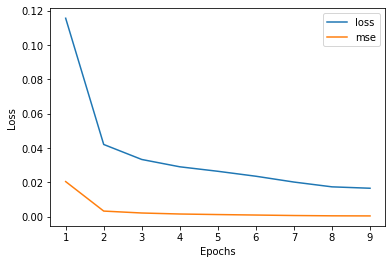

In [5]:
pd.DataFrame(history.history)[1:].plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

### Model evaluation

In [6]:
# evaluate()
soh_estimator.evaluate(test_in, test_out)

283/283 [==============================] - 1s 2ms/step - loss: 0.0162 - mse: 4.3501e-04


[0.01624867506325245, 0.00043501073378138244]

In [7]:
test_in

<tf.Tensor: shape=(9025, 5), dtype=float64, numpy=
array([[ 3.49843352e+00, -2.01420247e+00,  3.34222528e+01,
         2.01500000e+03,  4.20000000e+01],
       [ 3.86603840e+00, -2.01165855e+00,  2.61400353e+01,
         1.32047000e+02,  1.10000000e+02],
       [ 3.51623196e+00, -2.01391613e+00,  3.09461414e+01,
         9.65687000e+02,  1.50000000e+02],
       ...,
       [ 3.72000418e+00, -2.01322427e+00,  2.93400818e+01,
         5.53546000e+02,  8.50000000e+01],
       [ 3.66723755e+00, -2.01150584e+00,  2.93618032e+01,
         7.40969000e+02,  8.10000000e+01],
       [ 3.80996165e+00, -2.01401784e+00,  2.55818919e+01,
         1.69516000e+02,  1.46000000e+02]])>

In [8]:
test_out

<tf.Tensor: shape=(9025,), dtype=float64, numpy=
array([1.76231507, 1.44904216, 1.32387242, ..., 1.5382366 , 1.55976595,
       1.3231709 ])>

In [9]:
soh_estimator.predict(test_in)

array([[1.7962412],
       [1.4393295],
       [1.3224748],
       ...,
       [1.5726665],
       [1.5718089],
       [1.3215543]], dtype=float32)

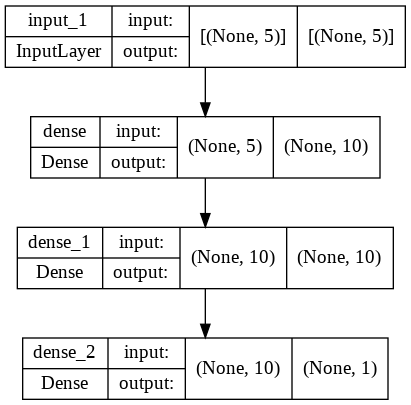

In [10]:
tf.keras.utils.plot_model(model=soh_estimator, show_shapes=True)

In [11]:
# Save the model
soh_estimator.save("soh_estimator.h5")